# Tweet and Sentiment Analysis

### Sentiment analysis of ~1,200 tweets with #beacons as well as the top hashtags assoicated with the #beacons tweets and the top tweeters.

In [102]:
import nltk
import csv
import numpy as np
import re
from collections import defaultdict
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### Sentiment Analysis

In [2]:
negative = []
with open("words_negative.csv", "rb") as file:
    reader = csv.reader(file)
    for row in reader:
        negative.append(row)

In [3]:
positive = []
with open("words_positive.csv", "rb") as file:
    reader = csv.reader(file)
    for row in reader:
        positive.append(row)

In [14]:
def sentiment(text):
    temp = [] #
    text_sent = nltk.sent_tokenize(text)
    for sentence in text_sent:
        n_count = 0
        p_count = 0
        sent_words = nltk.word_tokenize(sentence)
        for word in sent_words:
            for item in positive:
                if(word == item[0]):
                    p_count +=1
            for item in negative:
                if(word == item[0]):
                    n_count +=1

        if(p_count > 0 and n_count == 0): #any number of only positives (+) [case 1]
            #print "+ : " + sentence
            temp.append(1)
        elif(n_count%2 > 0): #odd number of negatives (-) [case2]
            #print "- : " + sentence
            temp.append(-1)
        elif(n_count%2 ==0 and n_count > 0): #even number of negatives (+) [case3]
            #print "+ : " + sentence
            temp.append(1)
        else:
            #print "? : " + sentence
            temp.append(0)
    return temp

In [25]:
alltweets = []
with open("beacons_tweets.csv", "rU") as file:
    reader = csv.reader(file)
    for row in reader:
        alltweets.append(row)

In [26]:
alltweets[0]

['RT @Verifone: #NRF16 takeaway: enhancing the consumer experience w/ #beacons https://t.co/c68gM3IFon @Allrecipes @RebaHow https://t.co/nnub\xe4\xf3_']

In [138]:
n_count = 0
p_count = 0
neutral_count = 0

for atweet in alltweets:
    if np.average(sentiment(str(atweet))) < 0:
        n_count +=1
    if np.average(sentiment(str(atweet))) > 0:
        p_count +=1
    if np.average(sentiment(str(atweet))) == 0:
        neutral_count +=1
        
print 'Number of positive tweets: {0}'.format(p_count)
print 'Number of negative tweets: {0}'.format(n_count)
print 'Number of neutral tweets: {0}'.format(neutral_count)

Number of positive tweets: 139
Number of negative tweets: 38
Number of neutral tweets: 1023


### Hashtag Analysis

In [85]:
hashtag_regex = re.compile(r"(?i)(?<=\#)\w+") #use (?i)\#\w+' to show # 
allhashtags = []

for atweet in alltweets:
    match = re.findall(hashtag_regex, str(atweet))
    if match:
        allhashtags.append(match)

#print allhashtags

In [145]:
temph = []
for ahashtag in allhashtags:
    for x in range(len(ahashtag)):
        temph.append(ahashtag[x].lower())

print temph
#print len(temph)

['nrf16', 'beacons', 'iot', 'bigdata', 'beacons', 'wearables', 'security', 'mobile', 'beacons', 'restaurants', 'beacons', 'restaurants', 'growthhacking', 'realestate', 'physicalweb', 'beacons', 'growthhacking', 'realestate', 'physicalweb', 'beacons', 'mobile', 'shopper', 'nrf16', 'beacons', 'businesses', 'beacons', 'marketing', 'mobile', 'iotawards', 'iot', 'beacons', 'beacons', 'beacons', 'marketing', 'proximitymarketing', 'beacons', 'mobile', 'shopper', 'nrf16', 'beacons', 'beacons', 'beacons', 'mobile', 'customers', 'beacons', 'beacons', 'beacons', 'beacons', 'webinar', 'slides', 'beacons', 'beacons', 'store', 'beacontechnology', 'retail', 'beacons', 'iot', 'beacons', 'loyalty', 'beacons', 'bigdata', 'gamification', 'loyalty', 'beacons', 'bigdata', 'gamification', 'abouttime', 'beacons', 'wearables', 'beacons', 'rfid', 'iot', 'internetofthings', 'bigdata', 'beacons', 'wearables', 'security', 'beacons', 'customerexperience', 'cx', 'cem', 'internetofthings', 'bigdata', 'beacons', 'wea

In [146]:
hashtag_dict = defaultdict(int)

for hashtagx in temph:
    hashtag_dict[hashtagx] += 1
    sorted_hashtags = sorted(hashtag_dict.items(), key=itemgetter(1), reverse=True)       
print sorted_hashtags[2:35]
datah = sorted_hashtags[2:35]
#print hashtag_dict

[('iot', 144), ('retail', 99), ('mobile', 77), ('marketing', 56), ('retailers', 42), ('bigdata', 42), ('proximity', 38), ('ibeacon', 37), ('lookingforward', 36), ('ble', 35), ('mus', 35), ('wifi', 32), ('ibeacons', 25), ('digital', 25), ('rfid', 24), ('webinar', 23), ('apps', 23), ('innovation', 21), ('ecommerce', 19), ('eddystone', 19), ('analytics', 18), ('wearables', 18), ('omnichannel', 16), ('proximitymarketing', 15), ('physicalweb', 15), ('mobilemarketing', 14), ('internetofthings', 14), ('google', 14), ('mpos', 13), ('loyalty', 13), ('cx', 13), ('advertising', 13), ('aricent', 12)]


In [147]:
dfh = pd.DataFrame(datah)
dfh.columns = ['hashtags','count']
dfh = dfh.set_index('hashtags')
dfh.head()


,count
hashtags,
iot,144
retail,99
mobile,77
marketing,56
retailers,42


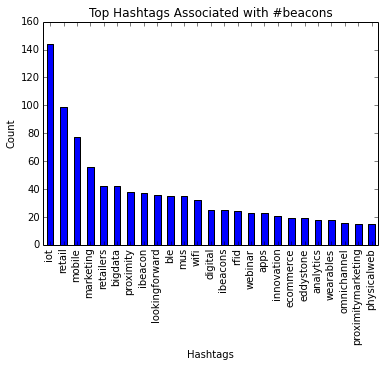

In [151]:
my_plot = dfh.head(25)
my_plot = my_plot.sort('count', ascending=False).plot(kind = 'bar', legend = None, title = 'Top Hashtags Associated with #beacons')
my_plot.set_xlabel('Hashtags')
my_plot.set_ylabel('Count')
plt.show()

### Username Analysis

In [141]:
username_regex = re.compile(r"(?<=@)\w+") #use (?<=@)\w+ to show @
allusernames = []
for atweet in alltweets:
    match = re.findall(username_regex, str(atweet))
    if match:
        allusernames.append(match)

print allusernames[0]

['Verifone', 'Allrecipes', 'RebaHow']


In [88]:
tempu = []
for ausername in allusernames:
    for y in range(len(ausername)):
        tempu.append(ausername[y])

#print temph
print len(tempu)

1192


In [133]:
username_dict = defaultdict(int)

for usernamey in tempu:
    username_dict[usernamey] += 1
    sorted_username = sorted(username_dict.items(), key=itemgetter(1), reverse=True)       
print sorted_username[:20]
datau = sorted_username[:20]
#print username_dict

[('Verifone', 71), ('ArubaNetworks', 45), ('orange', 36), ('Allrecipes', 31), ('RebaHow', 27), ('Estimote', 25), ('Beaconstac', 21), ('alanjni', 21), ('Unacast', 17), ('VenueNext', 17), ('MobileStrat360', 15), ('geomarketing', 15), ('pymnts', 14), ('Mobile360Katie', 13), ('MCommerceDaily', 12), ('easymobilad', 11), ('riteaid', 11), ('networkworld', 10), ('next2uApp', 10), ('pavelradda', 10)]


In [139]:
dfu = pd.DataFrame(datau)
dfu.columns = ['username','count']
dfu = dfu.set_index('username')
dfu.head()

,count
username,
Verifone,71
ArubaNetworks,45
orange,36
Allrecipes,31
RebaHow,27


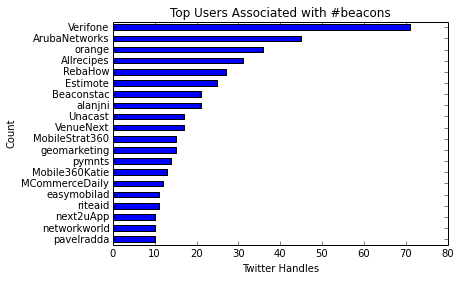

In [136]:
my_plotu = dfu.head(20)
my_plotu = my_plotu.sort('count').plot(kind = 'barh', legend = None, title = 'Top Users Associated with #beacons')
my_plotu.set_xlabel('Twitter Handles')
my_plotu.set_ylabel('Count')
plt.show()